In [1]:
import random
import ctypes
import numpy as np
import time
from ctypes import c_int
import matplotlib.pyplot as plt

In [2]:
testlib = ctypes.CDLL('test/pokerlib.so')

In [3]:
testlib.init_deck.restype = None
testlib.shuffle_deck.restype = None
testlib.init_cards_hash.restype = None
testlib.prepare_deck.restype = None
testlib.monte_carlo_sim.restype = ctypes.c_double
testlib.fast_monte_carlo_sim.restype = ctypes.c_double

In [4]:
actions = []
for x in [0,1,2,3]:
    for y in [0,1,2,3]:
        for z in [0,1,2,3]:
            action = [x,y,z]
            if action.count(3) == 1:
                actions.append(action)
actions = (ctypes.c_int * 3 * 27)(*(tuple(i) for i in actions))

In [206]:
deck = (ctypes.c_int * 52)(*([ctypes.c_int(0)] * 52))
testlib.init_deck(deck)
board = [[deck[-30], deck[-31], deck[-18], 0, 0], \
         [deck[-14], deck[-15], deck[-16], deck[-4], 0], \
         [deck[-1], deck[-2], deck[-3], deck[-17], 0]]
discarded = [deck[-23], deck[-24], deck[-25]]
fron_len = 5 - board[0].count(0)
midd_len = 5 - board[1].count(0)
back_len = 5 - board[2].count(0)
board_len = fron_len + midd_len + back_len
used_cards = board[0][:fron_len] + board[1][:midd_len] + board[2][:back_len] + discarded
no_used_cards = len(used_cards)
used_cards = (ctypes.c_int * no_used_cards)(*(used_cards))
board = (c_int * 5 * 3)(*(tuple(i) for i in board))
cards_left = 52 - no_used_cards

# SETTINGS
n_sim = ctypes.c_int(100000)
exps = []

testlib.prepare_deck( deck, used_cards, no_used_cards )

In [247]:
begin = time.clock()
exp = testlib.fast_monte_carlo_sim( board, deck, fron_len, midd_len, back_len, n_sim, cards_left )
exps.append(exp)
print "Time:", (time.clock() - begin) * 1000
print exp

Time: 7.11744334603
0.11944


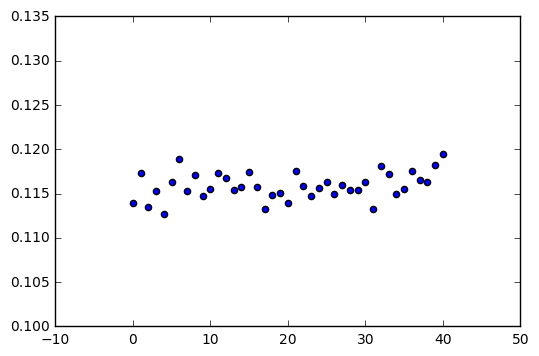

In [248]:
plt.scatter(range(len(exps)), exps)
plt.show()

In [134]:
%%time
testlib.init_cards_hash(deck)

Wall time: 0 ns


In [10]:
%%time
testlib.update_card_hash(deck, deck[-1], 0)
testlib.update_card_hash(deck, deck[-2], 1)
testlib.update_card_hash(deck, deck[-3], 2)
testlib.update_card_hash(deck, deck[-4], 3)
testlib.update_card_hash(deck, deck[-5], 4)
testlib.update_card_hash(deck, deck[-6], 5)
testlib.update_card_hash(deck, deck[-7], 6)
testlib.update_card_hash(deck, deck[-8], 7)
testlib.update_card_hash(deck, deck[-9], 8)

Wall time: 0 ns


In [11]:
fron_len = ctypes.c_int(2)
midd_len = ctypes.c_int(3)
back_len = ctypes.c_int(4)
n_sim = ctypes.c_int(10)
no_already_added = ctypes.c_int(9)
first = ctypes.c_int(1)

In [12]:
%%time
testlib.monte_carlo_sim(board, deck, back_len, midd_len, fron_len, n_sim, no_already_added, actions, first)

WindowsError: exception: access violation reading 0xFFFFFFFE03382990